## Multilabel classification with Logic Tensor Networks

This is a basic example in which we learn to ground unary predicates $A,B$ that are defined in the space of $[0,1]^2$.
We define the predicate $A$ to apply to points that are close to the middle point $c=(.5,.5)$. $B$ is defined using data as the opposite of $A$. It should hold for any point, for which $A$ does not hold. In order to get training data, we randomly sample data from the domain. We split the sample data into two separate sets based on whether their euclidian distance to $c$ is smaller than $.09$. We then define a number of facts for the predicate $A$. For all points that the predicate should apply to, we provide them as positive examples and vice versa for all points that the predicate does not apply to.

In [1]:
import logging;logging.basicConfig(level=logging.INFO);
import numpy as np;
import matplotlib.pyplot as plt; 
import logictensornetworks_wrapper as ltnw;

Set the number of random training samples, the maximum number of epochs and how often we query the knowledgebase sat level in training.

In [2]:
nr_samples=500
max_epochs=10000
track_sat_levels=1000

Sample random data from $[0,1]^2$

In [3]:
data=np.random.uniform([0,0],[1.,1.],(nr_samples,2)).astype(np.float32)


Our groundtruth positive training data for A is close to the center (.5,.5). All other data is considered as positive example of $B$.

In [4]:
data_A=data[np.where(np.sum(np.square(data-[.5,.5]),axis=1)<.09)]
data_B=data[np.where(np.sum(np.square(data-[.5,.5]),axis=1)>=.09)]

We use three variables for feeding data to $A,B$. All points ($\mathrm{?data}$), points for which A is true ($\mathrm{?data\_A}$), points for which $B$ is true ($\mathrm{?data\_B}$).

In [5]:
ltnw.variable("?data",data);
ltnw.variable("?data_A",data_A);
ltnw.variable("?data_B",data_B);

Define the predicates $A,B$. $A,B$ have arity 1 (single argument) with 2 dimensions (since the domain is $[0,1]^2$)

In [6]:
ltnw.predicate("A",2);
ltnw.predicate("B",2);

Now we add some facts to the knowledgebase. We express that for all points in $\mathrm{?data\_A}$, $A$ should be true. For all points in $\mathrm{?data\_B}$, $B$ is true. For all points, iff  $A$ is true, $B$ is not true and vice versa.

In [7]:
ltnw.formula("forall ?data_A: A(?data_A)")
ltnw.formula("forall ?data_B: ~A(?data_B)")

ltnw.formula("forall ?data_B: B(?data_B)")
ltnw.formula("forall ?data_A: ~B(?data_A)")

ltnw.formula("forall ?data: A(?data) -> ~B(?data)")
ltnw.formula("forall ?data: B(?data) -> ~A(?data)")

print("\n".join(sorted(ltnw.FORMULAS.keys())))

forall ?data: A(?data) -> ~B(?data)
forall ?data: B(?data) -> ~A(?data)
forall ?data_A: A(?data_A)
forall ?data_A: ~B(?data_A)
forall ?data_B: B(?data_B)
forall ?data_B: ~A(?data_B)


Initialize the knowledgebase and train the knowledgebase.

In [8]:
ltnw.initialize_knowledgebase(initial_sat_level_threshold=.1)
sat_level=ltnw.train(track_sat_levels=1000,sat_level_epsilon=.99,max_epochs=20000)

INFO:logictensornetworks_wrapper:Initializing knowledgebase
INFO:logictensornetworks_wrapper:Initializing optimizer
INFO:logictensornetworks_wrapper:Assembling feed dict
INFO:logictensornetworks_wrapper:Initializing Tensorflow session
INFO:logictensornetworks_wrapper:INITIALIZED with sat level = 0.65435773
INFO:logictensornetworks_wrapper:TRAINING 0 sat level -----> 0.65435773
INFO:logictensornetworks_wrapper:TRAINING 1000 sat level -----> 0.6839409
INFO:logictensornetworks_wrapper:TRAINING 2000 sat level -----> 0.69627523
INFO:logictensornetworks_wrapper:TRAINING 3000 sat level -----> 0.708453
INFO:logictensornetworks_wrapper:TRAINING 4000 sat level -----> 0.7224013
INFO:logictensornetworks_wrapper:TRAINING 5000 sat level -----> 0.74208975
INFO:logictensornetworks_wrapper:TRAINING 6000 sat level -----> 0.77202994
INFO:logictensornetworks_wrapper:TRAINING 7000 sat level -----> 0.8063013
INFO:logictensornetworks_wrapper:TRAINING 8000 sat level -----> 0.834497
INFO:logictensornetworks_wr

Visualize results

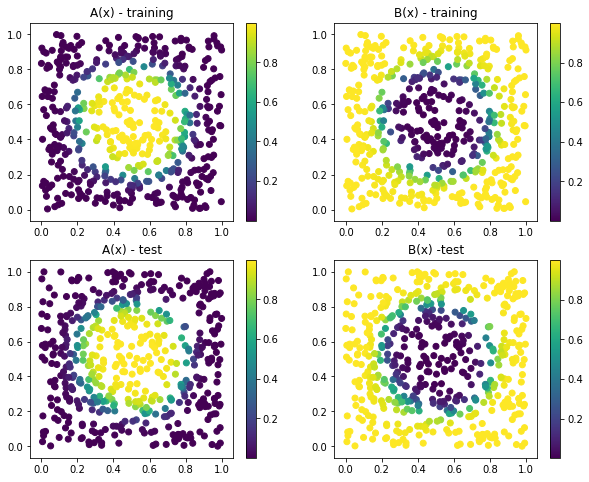

In [9]:
result=ltnw.ask("A(?data)")
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.title("A(x) - training")
plt.scatter(data[:,0],data[:,1],c=result.squeeze())
plt.colorbar()

plt.subplot(2,2,2)
result=ltnw.ask("B(?data)")
plt.title("B(x) - training")
plt.scatter(data[:,0],data[:,1],c=result.squeeze())
plt.colorbar()

data_test=np.random.uniform([0,0],[1.,1.],(nr_samples,2)).astype(np.float32)
ltnw.variable("?data_test",data_test)
result=ltnw.ask("A(?data_test)")
plt.subplot(2,2,3)
plt.title("A(x) - test")
plt.scatter(data_test[:,0],data_test[:,1],c=result.squeeze())
plt.colorbar()

result=ltnw.ask("B(?data_test)")
plt.subplot(2,2,4)
plt.title("B(x) -test")
plt.scatter(data_test[:,0],data_test[:,1],c=result.squeeze())
plt.colorbar()

plt.show()